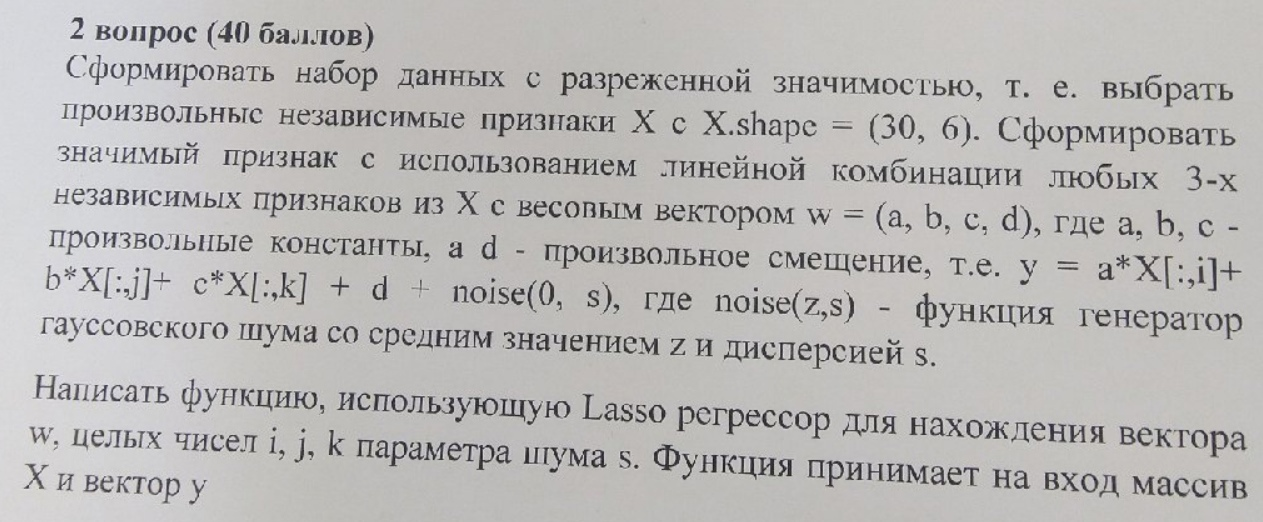

In [24]:
import numpy as np
from sklearn.datasets import make_classification,make_regression
from sklearn.linear_model import Lasso

In [33]:
samples = 30
features = 6
informative_features = 3
X = make_regression(n_samples=samples, n_features=features, n_informative=features, n_targets=0)[0]
i,j,k = np.sort(np.random.choice(range(features), size = informative_features,replace = False)) #индексы признаков

coefs = np.random.uniform(1, 20, size = informative_features) 
d = np.random.uniform(1, 20)  #смещение
s = 5
c = np.sqrt(s)
noise = np.random.normal(loc = 0,scale = c,size = X.shape[0]) # задаем шум нормальным распределением
w = (coefs[0],coefs[1],coefs[2],d)
y = X[:,(i,j,k)]@coefs + d + noise

In [34]:
print(f'Набор:\nw = {w};\ns = {s};\ni,j,k = {i,j,k}')    

Набор:
w = (17.92679783802598, 16.293449799793493, 11.686485769468698, 14.290582932580882);
s = 5;
i,j,k = (1, 2, 4)


In [35]:
def lasso_regression(x,y):
    model = Lasso()
    model.fit(x,y)
    coefs_idx = np.where(model.coef_ !=0)
    w = np.append(model.coef_[coefs_idx],model.intercept_)
    return {'w':w,'s':np.var(y-model.predict(x)),'i,j,k':coefs_idx,'model':model}

In [36]:
print('Результат:\n',lasso_regression(X,y))

Результат:
 {'w': array([16.20770865, 15.71507286,  9.88604785, 13.87782515]), 's': 7.320848118058439, 'i,j,k': (array([1, 2, 4], dtype=int32),), 'model': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)}
